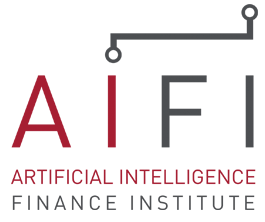

# Bootcamp - Python and Coding - Primer

# Reactive programming in Python

# About this Notebook


In this notebook, we look at reactive programming. Reactive programming is a declarative programming paradigm that is concerned with data streams and the propagation of change over time. This programming style allows developers to work with asynchronous data streams, which can be anything from click events, changes in variables, data fetches, to incoming stock prices. It involves defining how different data streams should be connected, transformed, or reacted to.



In the world of finance, particularly in applications that deal with trading or real-time data processing, reactive programming can be extremely beneficial. Here are some reasons why:





- __Abstraction of Asynchronous Processing__: In finance applications, one common task is to process and react to a stream of market data. With reactive programming, these data are modeled as streams that events flow through. The asynchronous nature of these events is abstracted away, allowing developers to focus on the logic of their applications rather than the complexities of asynchronous processing.



- __Real-time Processing__: Reactive programming supports real-time data processing, allowing finance applications to react to market changes instantly. This is particularly crucial in high-frequency trading where algorithms make trades based on immediate changes in the market.


- __Resiliency and Scalability__: Reactive systems are designed to be resilient and maintain responsiveness even in the face of failure. This resilience is established by replication, containment, isolation, and delegation. Reactive systems are also highly scalable which is vital in finance as data volumes can be huge and systems should be able to handle increased loads gracefully.


- __Easier to Reason About__: Despite being fundamentally asynchronous, reactive programming allows code to be written in a more linear style, which makes it easier to understand and reason about. This is a big win for developers as asynchronous code can often be challenging to write and debug.



- __Efficient Resource Usage__: Reactive programming can be more efficient than traditional threading models in tasks that require handling a lot of concurrent operations, such as processing high-frequency updates from many different sources (e.g., stock prices from various exchanges). By using non-blocking operations and event-driven programming, reactive programming allows developers to make better use of system resources.

In a nutshell, for applications in the finance domain that need to handle high volumes of real-time or near-real-time data, and need to react swiftly and reliably to changes in that data, reactive programming can be an excellent choice of paradigm.

We will be using [ReactiveX](https://github.com/ReactiveX/RxPY) for Python. ReactiveX for Python (RxPY) is a library for composing asynchronous and event-based programs using observable sequences and pipable query operators in Python. Using Rx, developers represent asynchronous data streams with Observables, query asynchronous data streams using operators, and parameterize concurrency in data/event streams using Schedulers.

# Imports

In [3]:
import rx
from rx import operators as ops
import random
import time
import rx
from concurrent.futures import Future, ThreadPoolExecutor

__Iterable:__

- Pull model
- Sequence of elements
- Block until available
- Use Python's built-in `next` function to pull the next element from an iterable

In [5]:
iterable = iter([1, 2, 3, 4, 5])
e = next(iterable)
print(e)  # Outputs: 1

1


__Observable:__

- Push model
- Sequence of events
- Get notified as they happen
- Use the `subscribe` method in RxPY to register an observer to get the events

In [4]:
source = rx.from_iterable([1, 2, 3, 4, 5])
subscription = source.subscribe(print)

1
2
3
4
5


In the reactive programming paradigm, observables emit items that observers consume. This is the "push" model, as you receive items as they become available. The observable can notify the observer of new data, completion of the data stream, or any errors. You can create an observable sequence from a wide range of data sources, including existing arrays or iterable objects.

On the other hand, an iterable is a "pull" model. The consumer controls the rate at which it consumes items and it must pull items from the producer. The consumer is also responsible for iterating over the items.

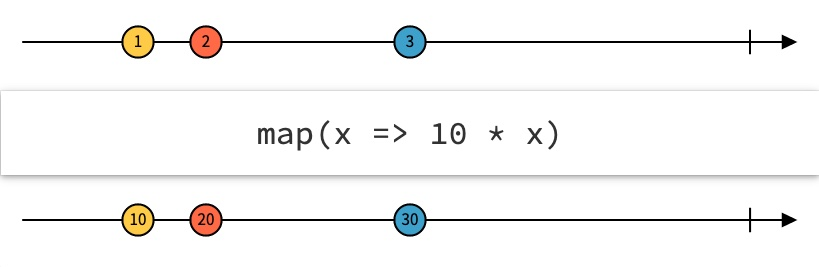

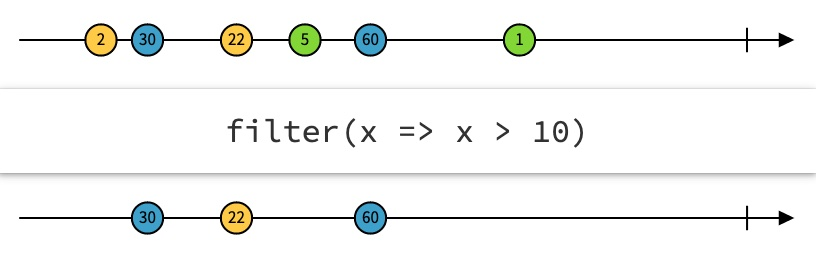

Reference: [rxmarbles](https://rxmarbles.com/#map)

In [6]:
# Create an observable sequence
source = rx.from_iterable([0, 1, 2, 3, 4, 5])

# Apply some operators to the sequence
source.pipe(
    ops.map(lambda x: x * 10),  # Multiply each value by 10
    ops.filter(lambda x: x >= 10)  # Only allow values greater than 10
).subscribe(
    on_next=lambda x: print(f"Received: {x}"),  # Print each value as it's received
    on_completed=lambda: print("Done!")  # Print "Done!" when all values have been received
)


Received: 10
Received: 20
Received: 30
Received: 40
Received: 50
Done!


## Illustrative example

This example illustrates how RxPy can be used to create a reactive pipeline for processing real-time stock market data and feeding it into an ML model. The pipeline is able to preprocess the data and use the ML model to make predictions on the fly as new data comes in.

In [ ]:
# Assuming `get_realtime_data()` is a function that fetches real-time stock data
real_time_data = get_realtime_data()  # This is an Observable

# Preprocessing function
def preprocess(data):
    # Perform some preprocessing on `data`
    preprocessed_data = ...
    return preprocessed_data

# ML model
model = ...  # Some pre-trained ML model

real_time_data.pipe(
    ops.map(preprocess),  # Preprocess the data
    ops.map(model.predict)  # Use the ML model to make a prediction
).subscribe(
    on_next=lambda prediction: print(f"Prediction: {prediction}"),
    on_error=lambda e: print(f"Error: {e}"),
    on_completed=lambda: print("Done!")
)

There is a lot more to do with RxPy for more examples refer to the [reference](https://rxpy.readthedocs.io/en/latest/reference.html) in their documentation.

## Callables

In the context of reactive programming and RxPy, a `Callable` is a special type of function that takes an Observable and returns an `Observable`.

In essence, it's a transformation function that you can apply to an `Observable`.

RxPy operators like `map()`, `filter()`, and many others, are examples of such `Callables`.

Let's take `map()` as an example:

In [8]:
# Here, multiply_by_two is a Callable that gets applied to every item emitted by the Observable source.
def multiply_by_two(x):
    return x * 2

source = rx.from_([1, 2, 3, 4, 5])

mapped = source.pipe(
    ops.map(multiply_by_two),
)
mapped.subscribe(print)


2
4
6
8
10


## Futures

Futures, are a concurrency primitive used for asynchronous programming. In Python, a Future represents a computation that hasn't necessarily completed yet. Futures are often used in multithreaded and distributed systems to represent the result of a computation that might be happening in another thread or on another machine.

Let's consider an example where you are requesting real-time stock prices from a service that provides this data. In a distributed system, this might be a separate service that fetches the data and returns it as a Future.

In the example below, the fetch_stock_price() function simulates an operation that fetches the real-time price of a stock. This operation could be happening on another thread or even another machine.

The rx.from_future(future) function creates an Observable that will emit the value of the Future when it's ready. This Observable can be subscribed to just like any other Observable.

Please note that Futures are most useful when you're doing some kind of asynchronous or concurrent programming. If you're just fetching stock prices sequentially, you probably wouldn't need to use Futures. However, in a real-world application, you'd likely be doing more complex processing that could benefit from concurrency, and that's where Futures and RxPy can really shine.

In [12]:
def fetch_stock_price(stock_symbol):
    # Simulate the delay of network or computation with time.sleep
    time.sleep(random.uniform(0.5, 1.5))
    # This could be an API call to a service that returns the real-time price of the stock
    return 200.00  # Just returning a dummy price for this example.

# Create a ThreadPoolExecutor
executor = ThreadPoolExecutor(max_workers=2)

# Use the executor to fetch the stock price. This returns a Future.
future = executor.submit(fetch_stock_price, "AAPL")

# Create an Observable from the Future.
observable = rx.from_future(future)

# Subscribe to the Observable. This will print the price when it's ready.
observable.subscribe(lambda price: print(f"The price of AAPL is: {price}"))

# Let's simulate some delay before the main thread exit.
time.sleep(2)


Current price of AAPL is 296.7480036424503
Current price of GOOG is 187.83217159627682
Current price of MSFT is 166.29213916353768
Current price of AMZN is 220.22408774725443
Elon is buying AAPL at 94.74084552480134
The price of AAPL is: 200.0
Current price of GOOG is 113.04550809624456
Current price of AAPL is 226.47294376801307
Current price of MSFT is 141.00599654563376
Current price of AMZN is 104.04689442735801
Elon is buying AAPL at 54.85567574940538


In [9]:
class StockMarket:
    def __init__(self, symbols):
        self.symbols = symbols

    def price_stream(self, symbol):
        return rx.interval(1).pipe(
            ops.map(lambda _: (symbol, random.uniform(50.0, 300.0))),
        )

    def market_stream(self):
        return rx.merge(*[self.price_stream(symbol) for symbol in self.symbols])

In [ ]:
class StockBroker:
    def __init__(self, name):
        self.name = name

    def track_prices(self, market_stream):
        market_stream.subscribe(
            on_next = self.show_price,
            on_error = lambda e: print("Error Occurred: {0}".format(e)),
            on_completed = lambda: print("End of prices."),
        )

    def buy_low(self, market_stream, symbol, threshold):
        market_stream.pipe(
            ops.filter(lambda quote: quote[0] == symbol and quote[1] < threshold)
        ).subscribe(
            on_next = lambda quote: print(f"{self.name} is buying {quote[0]} at {quote[1]}"),
            on_error = lambda e: print("Error Occurred: {0}".format(e)),
            on_completed = lambda: print("End of prices."),
        )

    @staticmethod
    def show_price(quote):
        print(f"Current price of {quote[0]} is {quote[1]}")

In [10]:
symbols = ["AAPL", "GOOG", "MSFT", "AMZN"]
market = StockMarket(symbols)
stream = market.market_stream()

elon = StockBroker("Elon")

# Elon tracks all price changes
elon.track_prices(stream)

# Elon buys when a certain stock goes below a certain price
elon.buy_low(stream, "AAPL", 100)

# Let the market run for a while
time.sleep(10)

Current price of GOOG is 195.7703371380627
Current price of AAPL is 242.4424066447548
Current price of MSFT is 130.90721013562143
Elon is buying AAPL at 59.22361616014733
Current price of AMZN is 220.51570265378726
Current price of AAPL is 267.23563258440515
Current price of GOOG is 270.09663324809355
Current price of MSFT is 132.4946641053682
Current price of AMZN is 135.28906373485808
Current price of AAPL is 105.2425878949403
Current price of MSFT is 227.15974795618547
Current price of GOOG is 131.19939236660372
Current price of AMZN is 82.72191260586791
Current price of AAPL is 169.7108255584215
Current price of MSFT is 291.72693824435896
Current price of AMZN is 203.44173288865306
Current price of GOOG is 96.27284925096895
Current price of AAPL is 189.67241192950112
Current price of GOOG is 234.04463684671316
Current price of MSFT is 276.1611962574985
Current price of AMZN is 291.7952282757891
Current price of AAPL is 168.63133991283968
Current price of GOOG is 79.65052335814391
C

## About the code

The code is an example of how the reactive programming model can be used to implement a simple stock market observer and a buying strategy in Python. It utilizes the RxPY library, a Python implementation of the Reactive Extensions (Rx) library, which offers a set of tools and abstractions for handling asynchronous data streams and their transformations.

In the scenario of finance applications, especially in algorithmic trading, real-time and high-frequency data processing is critical. Financial data, like stock prices, are essentially continuous streams of data. Reactive programming provides a way to build systems that are responsive, resilient, and elastic, which are key characteristics needed for such applications.

Now let's break down the code:

- `StockMarket`: This is a simulated stock market that emits stock prices for certain symbols at a regular interval of 1 second.

- `price_stream(self, symbol)`: This function returns an Observable stream of prices for a given stock symbol. The rx.interval(1) creates a stream that emits a value every second, and this is transformed into a (symbol, price) tuple using the map operator.

- `market_stream(self)`: This function merges all the price streams for different symbols into a single stream using rx.merge.

- `StockBroker`: This represents a stock market observer or trader. It has a name and two functions:

  - `track_prices(self, market_stream)`: This function takes the market stream as input, and subscribes to it, printing the price of every stock every time it changes.

  - `buy_low(self, market_stream, symbol, threshold)`: This function also takes the market stream as input, along with a stock symbol and a price threshold. It filters the market stream for cases where the price of the given stock is below the threshold, and subscribes to this filtered stream, printing a message every time this condition is met.

- We then create a stock market with a few symbols, create a stock broker (Elon), and let him track the prices and apply his buying strategy.

- In the end, we let the market run for a while using time.sleep(10).

<br>

This example illustrates the fundamentals of a simplified automated trading bot, where a stream of price data is continuously processed to apply decision-making logic. The bot is set up to perform actions, such as buying or selling, based on these decisions. While this scenario is considerably simplified, the core principles would persist in more complex systems.

In reality, building an automated trading bot involves integrating much more intricate decision-making mechanisms, which could encompass machine learning algorithms, advanced statistical models, and complex computational tools. The conditions for buying or selling could be more sophisticated, taking into account factors like the historical performance of a stock, the overall market conditions, company news, and predictions from machine learning models.

However, it's important to note that for extremely high-frequency trading systems, other languages like C++ would be preferred for their lower-level control and faster execution times.

Nonetheless, reactive programming helps significantly in this context by making it easy to express such complex, asynchronous workflows. As you expand on this basic system, you'll see how reactive programming can make handling real-time data and complex logic more manageable.